In [1]:
import pandas as pd
import re
hotel = pd.read_csv("Hard_Rock_New_Review.csv", engine='python')


In [ ]:
pip install --user -U nltk

In [3]:
pip install --user -U wordcloud

  Using cached wordcloud-1.8.1-cp37-cp37m-win_amd64.whl (154 kB)
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied, skipping upgrade: numpy>=1.6.1 in c:\users\hp\python\python37\lib\site-packages (from wordcloud) (1.18.1)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\users\hp\python\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
import nltk
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from nltk import FreqDist
nltk.download('stopwords') # run this one time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords, wordnet


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# exploratory data analysis

In [3]:
print(hotel.describe().transpose())

             count        mean         std   min     25%     50%      75%  \
Unnamed: 0  3062.0  1530.50000  884.067588   0.0  765.25  1530.5  2295.75   
Rating      3062.0    41.67211    9.409880  10.0   40.00    40.0    50.00   

               max  
Unnamed: 0  3061.0  
Rating        50.0  


In [4]:
hotel.head()

,Unnamed: 0,Date,Rating,Title,Review
0,0,17 March 2020,50,It's not noisy,It may sound noisy initially but if you find a...
1,1,13 March 2020,40,Good burger and unique atmosphere,I had a very good burger here. The atmosphere ...
2,2,24 February 2020,30,!00 people for breakfast,We pre arranged breakfast for 100 people and t...
3,3,23 February 2020,50,Combo Platter For Two!,"Nice Decor! Share a platter: crumbed chicken, ..."
4,4,12 February 2020,50,Last drinks before home,This is a great hard rock I've never been to a...


In [5]:
hotel[hotel['Review'].isnull()]

,Unnamed: 0,Date,Rating,Title,Review


In [6]:
hotel['Rating'] = hotel['Rating'].replace({10:'VERY NEGATIVE',20:'NEGATIVE',30:'NEUTRAL',40:'POSITIVE',50:'VERY POSITIVE'})

# function to plot most frequent terms

In [7]:

def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

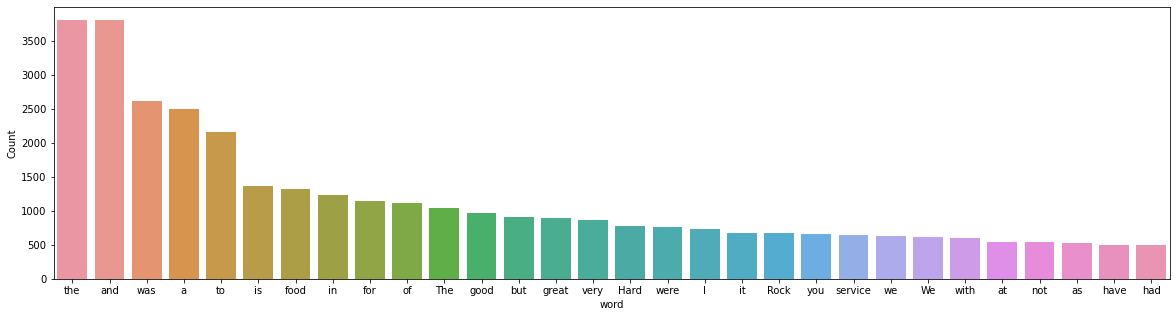

In [8]:
freq_words(hotel['Review'])

# lenghth of review

In [9]:
hotel_1 = hotel.copy()
hotel_1["Review"] = hotel_1["Review"].apply(str)

In [10]:
hotel_1["REVIEWS LENGTH"] = hotel_1["Review"].apply(lambda w : len(re.findall(r'\w+', w)))

In [11]:
hotel_1.sample(20)

,Unnamed: 0,Date,Rating,Title,Review,REVIEWS LENGTH
2696,2696,30 May 2014,VERY POSITIVE,Perfect fish filet sandwich,Visit The Hard Rock Cafe at Time Square in NY ...,38
1481,1481,12 January 2012,VERY POSITIVE,Amazing,"Great burgers, music and the best coffee in th...",10
2329,2329,20 November 2015,POSITIVE,You know what to expect...,I did visit many Hard Rock Cafe's worldwide an...,44
2618,2618,7 October 2014,POSITIVE,"Great Visit, great customer Service!",I had the brisket nachos! I took the picture w...,30
494,494,9 October 2016,POSITIVE,Great foid,Very popular restaurant given its location. Gr...,20
62,62,6 June 2019,POSITIVE,fantastic experience,very friendly staff and food is excellent. Com...,24
2001,2001,24 November 2016,VERY POSITIVE,Good food and friendly staff,"As any Hard Rock Cafe around the world, it has...",35
1648,1648,5 February 2019,VERY POSITIVE,First time at Hard Rock,"Really enjoyed this restaurant, had the imposs...",34
2685,2685,30 June 2014,VERY POSITIVE,Great surroundings,Great decor all around some interesting memora...,18
1731,1731,20 April 2018,VERY POSITIVE,Good experience,We visited here for some late night food whils...,37


In [11]:
hotel_1["REVIEWS LENGTH"].describe()

count    3062.000000
mean       31.238733
std         8.714959
min         4.000000
25%        24.000000
50%        31.000000
75%        38.000000
max        97.000000
Name: REVIEWS LENGTH, dtype: float64

In [12]:
hotel_1["REVIEWS LENGTH"].sum() # TOTAL NUMBERS OF WORDS IN REVIEWS IS 95653

95653

In [13]:
hotel_1["Review"].describe()

count                                                  3062
unique                                                 1543
top       This Hard Rock is as good as any other Hard Ro...
freq                                                      3
Name: Review, dtype: object

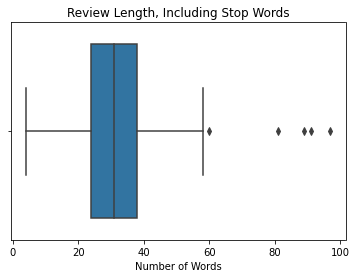

In [14]:
#plt.figure()
sns.boxplot(data = hotel_1, x = "REVIEWS LENGTH")
plt.xlabel('Number of Words')
plt.title('Review Length, Including Stop Words')
plt.show()

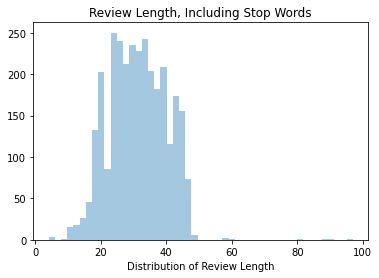

In [15]:
sns.distplot(hotel_1["REVIEWS LENGTH"], kde = False)
plt.xlabel('Distribution of Review Length')
plt.title('Review Length, Including Stop Words')
plt.show()

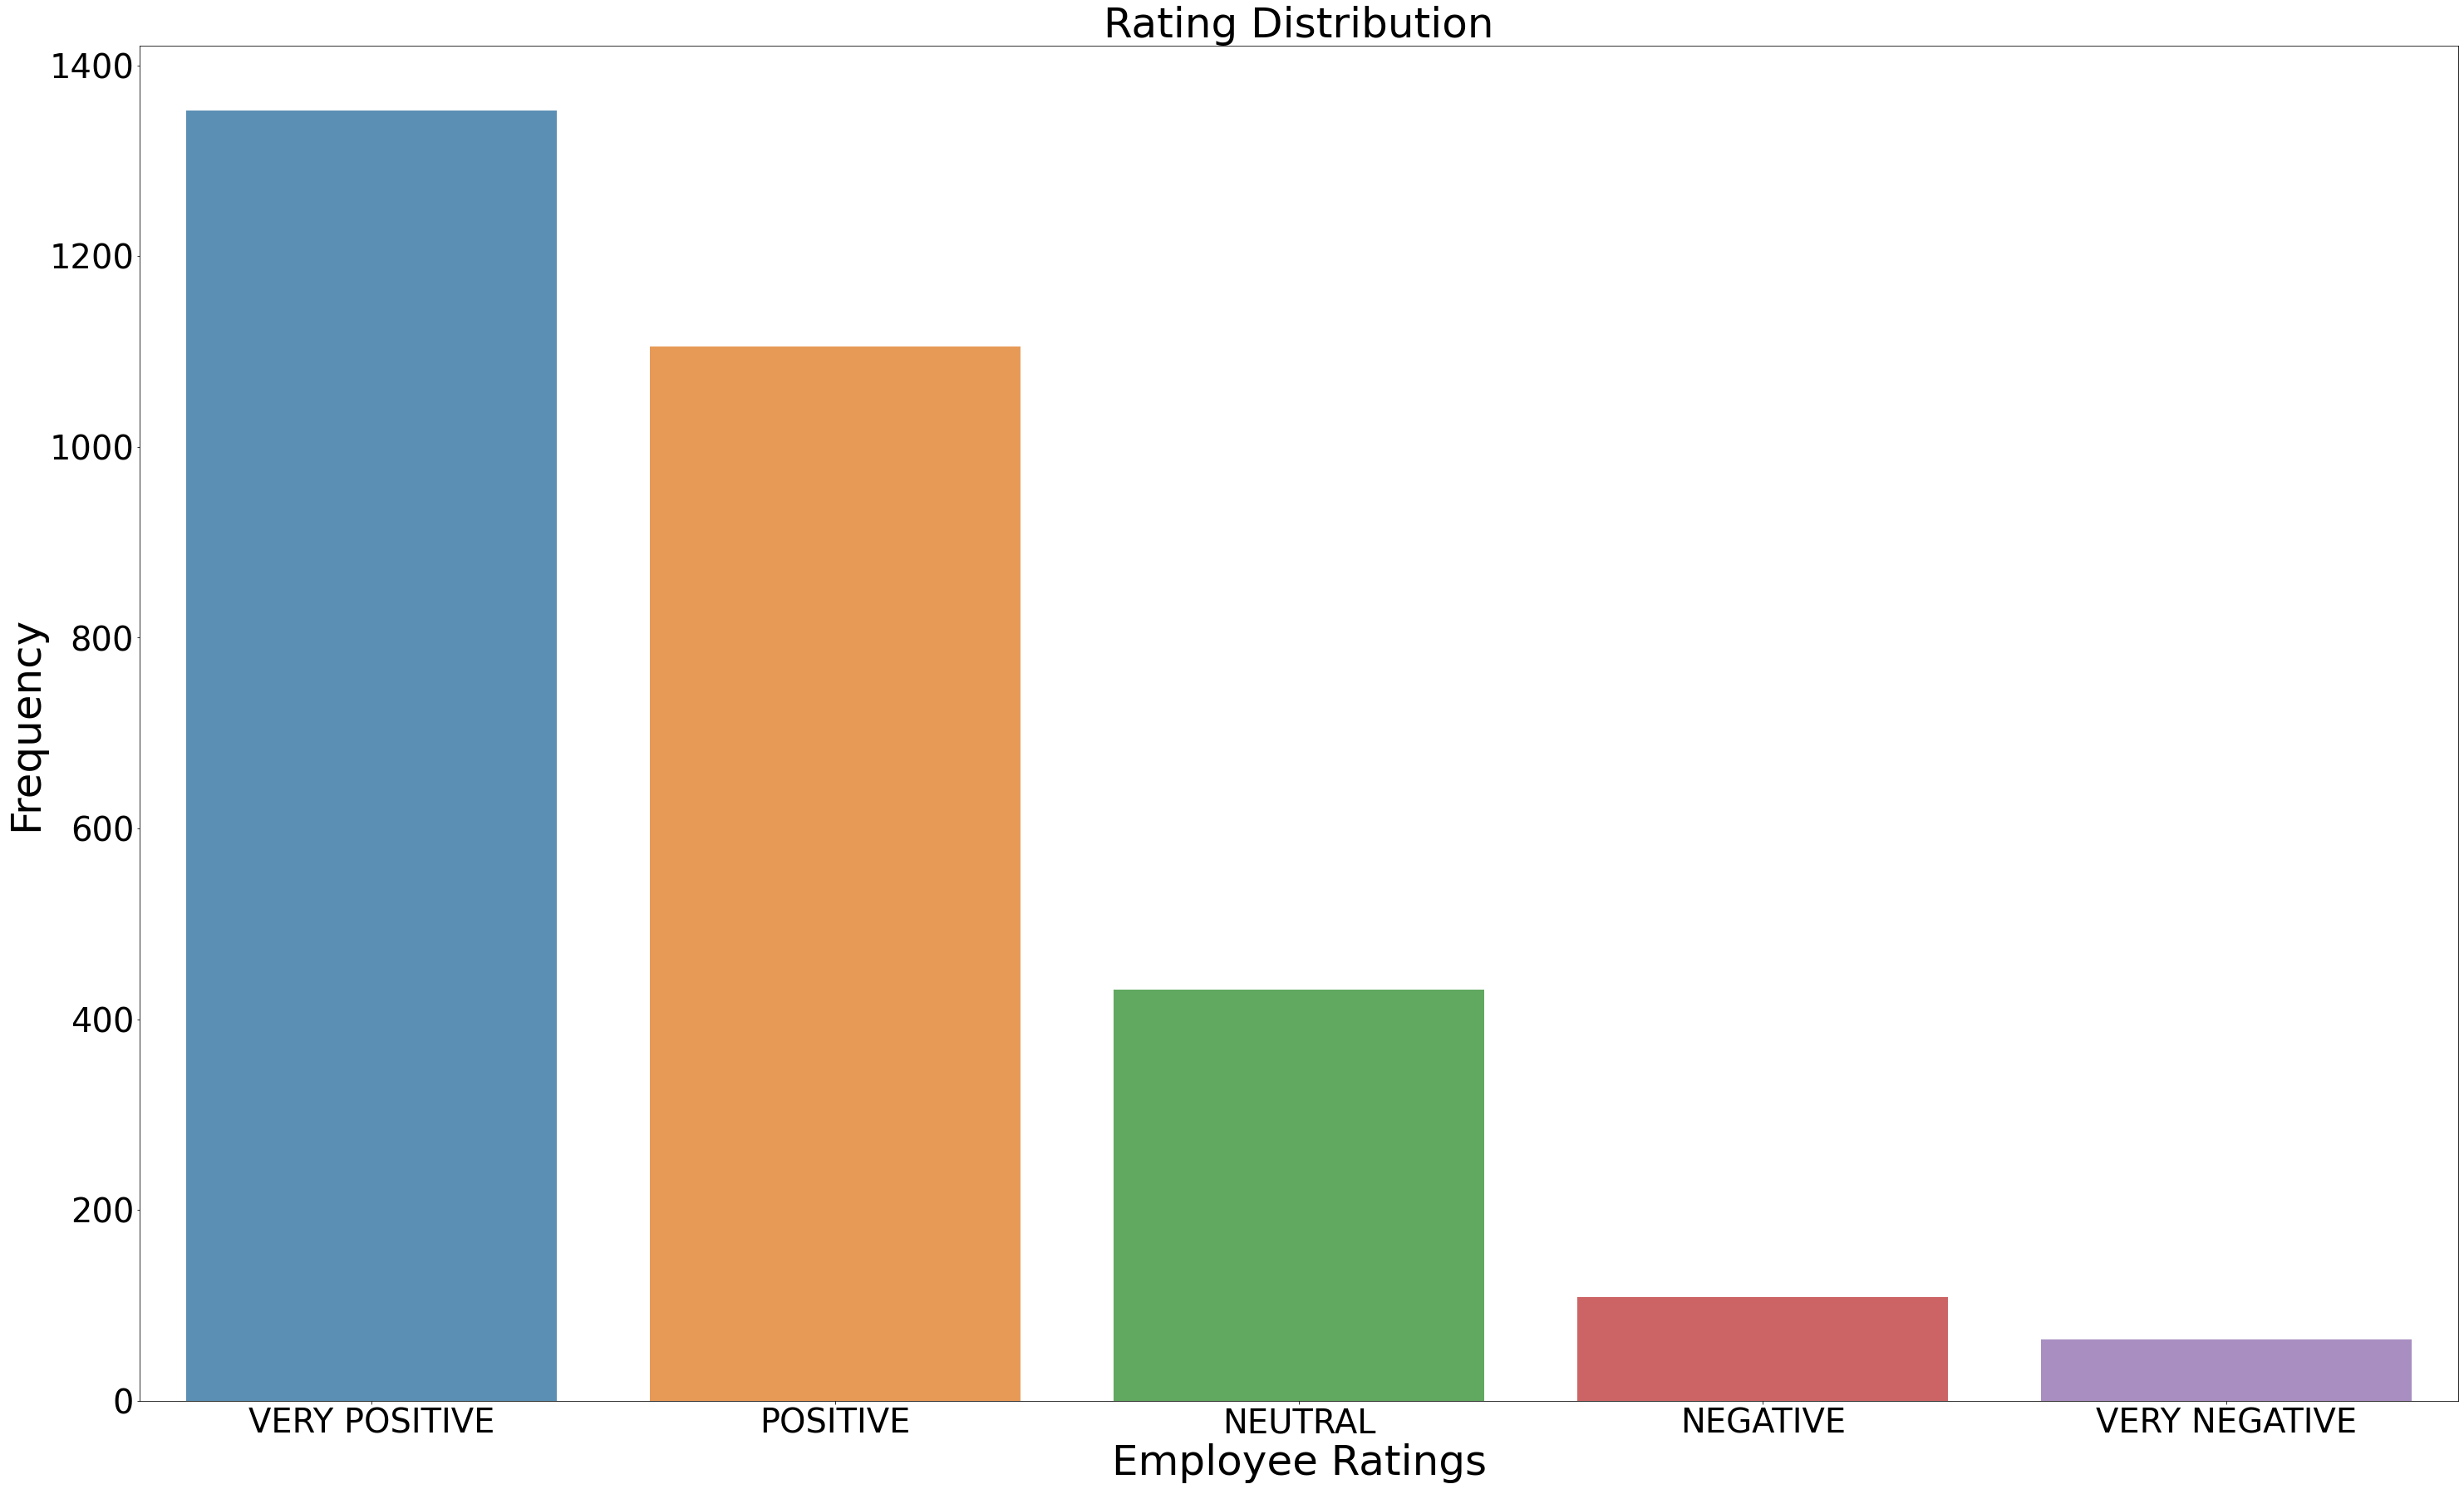

In [16]:
x_rating = hotel.Rating.value_counts()
y_rating = x_rating.sort_index()
plt.figure(figsize=(50,30))
sns.barplot(x_rating.index, x_rating.values, alpha=0.8)
plt.title("Rating Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Employee Ratings', fontsize=50)
plt.xticks(fontsize=40)
plt.show()

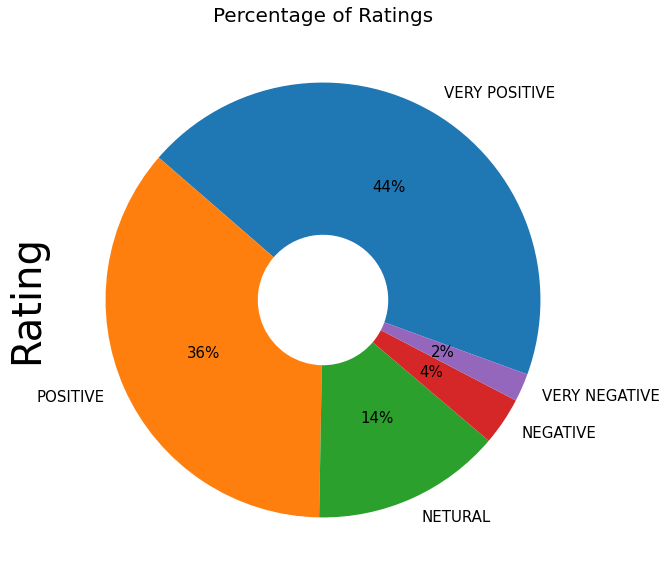

In [17]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Ratings', fontsize=20)
hotel.Rating.value_counts().plot(kind='pie', labels=['VERY POSITIVE','POSITIVE','NETURAL','NEGATIVE','VERY NEGATIVE'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})
plt.ylabel("Rating",fontsize=40)
plt.show()

c:\users\hp\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


<AxesSubplot:xlabel='Date'>

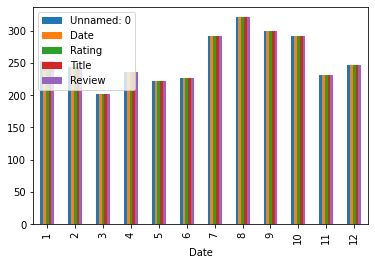

In [18]:
date=hotel['Date']
hotel.date = date.astype("datetime64")
hotel.groupby(hotel.date.dt.month).count().plot(kind="bar")

In [19]:
hotel.drop(['Unnamed: 0','Date','Rating','Title'],axis=1,inplace=True)

In [20]:
hotel.head()

,Review
0,It may sound noisy initially but if you find a...
1,I had a very good burger here. The atmosphere ...
2,We pre arranged breakfast for 100 people and t...
3,"Nice Decor! Share a platter: crumbed chicken, ..."
4,This is a great hard rock I've never been to a...


# cleaning the text


In [21]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
hotel_df = hotel.copy()
stop_words = stopwords.words("english")

In [23]:
def clean(s):
    s = s.lower()                   #Converting to lower case
    s = re.sub(r'[^\w\s]', ' ', s)  #Removing punctuation
    s = re.sub(r'[\d+]', ' ', s)    #Removing Numbers
    s = s.strip()                   #Removing trailing spaces
    s = re.sub(' +', ' ', s)        #Removing extra whitespaces
    return s

In [24]:
hotel_df["Review"] = hotel_df["Review"].apply(lambda x: clean(x))

In [25]:
hotel_df.head(20)

,Review
0,it may sound noisy initially but if you find a...
1,i had a very good burger here the atmosphere i...
2,we pre arranged breakfast for people and they ...
3,nice decor share a platter crumbed chicken spr...
4,this is a great hard rock i ve never been to a...
5,we booked online beforehand as i went a few ye...
6,not dissapionted at all it does what it says v...
7,we all had the legendary burger and it was del...
8,had dinner in here with my daughter and grandd...
9,you have to go in time to get a table but it s...


# stopwords

In [26]:
hotel_df["Review"] = hotel_df["Review"].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [27]:
hotel_df["Review"][2]

'pre arranged breakfast people opened us normal opening time standard usa breakfast nothing special good enough us long day new york'

# stemming

In [28]:

st = PorterStemmer()
hotel_df['Review'] = hotel_df['Review'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
hotel_df['Review']

0       may sound noisi initi find good place bar nois...
1       good burger atmospher uniqu expect hard rock m...
2       pre arrang breakfast peopl open us normal open...
3       nice decor share platter crumb chicken spring ...
4       great hard rock never bad countri favourit far...
                              ...                        
3057    great food good atmospher realli nice place su...
3058    wait hour half tabl sat cold room away main ro...
3059    new york style make hard rock best around worl...
3060    fun place eat food good seve quickli mani rock...
3061    food great ident menu everi locat server check...
Name: Review, Length: 3062, dtype: object

# world cloud

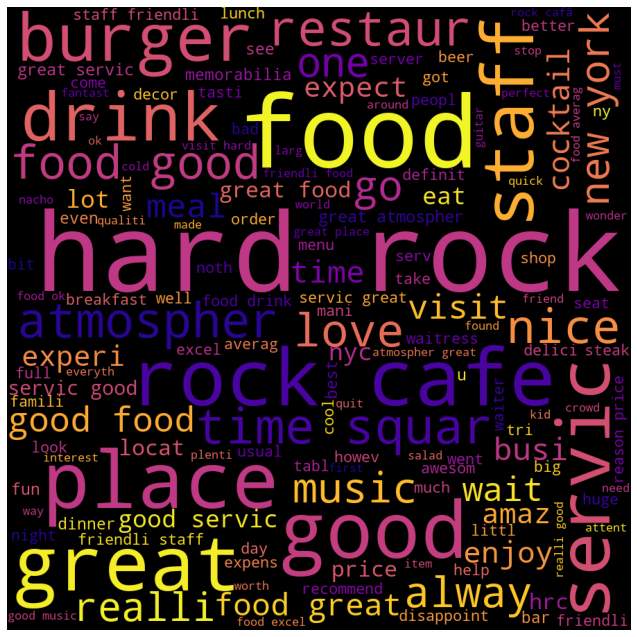

In [29]:
reviews = pd.Series(hotel_df["Review"].tolist()).astype(str)
plt.figure(figsize = (9, 9))
rev_wcloud_all = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(''.join(reviews))
plt.imshow(rev_wcloud_all)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

In [33]:
!pip install --user -U textblob


Requirement already up-to-date: textblob in c:\users\hp\appdata\roaming\python\python38\site-packages (0.15.3)


In [1]:
import textblob            
from textblob import TextBlob

ModuleNotFoundError: No module named 'textblob'

# TOKENIZATION

#### Tokenization is splitting a body of text into smaller units, such as individual words or terms. Each of these smaller units are called tokens

In [34]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

In [35]:
hotel_df['Review']=hotel_df['Review'].apply(str)

In [36]:
tokenizer = RegexpTokenizer(r'\w+')
hotel_df["Reviews_Token"] = hotel_df["Review"].apply(lambda x: tokenizer.tokenize(x))

# LEMMATIZATION

##### Lemmatization extracts the root of the word. For example, from the word "driving', "drive" is extracted. Unlike stemming, lemmatization understands the context and provides the root words rather than simply removing the suffix or prefix of the word.

In [37]:
lemm = WordNetLemmatizer()

In [38]:
def to_wordnet(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemm_text(text):
    nltk_tagged = nltk.pos_tag(text)
    # Result = (text, pos_tag)
    wordnet_tagged = map(lambda x: (x[0], to_wordnet(x[1])), nltk_tagged)
    lemm_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemm_sentence.append(word)
        else:
            lemm_sentence.append(lemm.lemmatize(word, tag))
    return lemm_sentence

In [39]:
import nltk
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
hotel_df["Reviews_Lemm"] = hotel_df["Reviews_Token"].apply(lambda x: lemm_text(x))

In [41]:
hotel_df[["Reviews_Token", "Reviews_Lemm"]].sample(14)

,Reviews_Token,Reviews_Lemm
1669,"[excel, even, atmospher, brilliant, servic, ex...","[excel, even, atmospher, brilliant, servic, ex..."
1351,"[love, eat, coctail, die, nacho, amaz, decor, ...","[love, eat, coctail, die, nacho, amaz, decor, ..."
323,"[dinner, big, group, adult, children, fun, enj...","[dinner, big, group, adult, child, fun, enjoy,..."
206,"[fab, atmospher, fab, staff, fab, food, would,...","[fab, atmospher, fab, staff, fab, food, would,..."
1154,"[consider, wait, tabl, expect, also, wait, qui...","[consider, wait, tabl, expect, also, wait, qui..."
2626,"[ever, go, hard, rock, must, agenda, one, nyc,...","[ever, go, hard, rock, must, agenda, one, nyc,..."
1156,"[noth, relev, highlight, restaur, keep, standa...","[noth, relev, highlight, restaur, keep, standa..."
2558,"[must, see, insid, huge, lot, rock, memorabili...","[must, see, insid, huge, lot, rock, memorabili..."
1558,"[alway, take, hrc, son, birthday, like, busi, ...","[alway, take, hrc, son, birthday, like, busi, ..."
1145,"[big, cafe, downstair, staff, nice, help, son,...","[big, cafe, downstair, staff, nice, help, son,..."


# most common words 

In [41]:
import itertools
import collections

In [42]:
review_list = list(itertools.chain.from_iterable(hotel_df['Reviews_Lemm']))
rev_word_freq = collections.Counter(review_list)

word_freq_DF = pd.DataFrame(rev_word_freq.most_common(15), columns=['Words', 'Count'])
word_freq_DF

,Words,Count
0,food,2189
1,good,1641
2,great,1521
3,rock,1142
4,servic,1140
5,hard,1000
6,time,752
7,place,684
8,go,667
9,staff,600


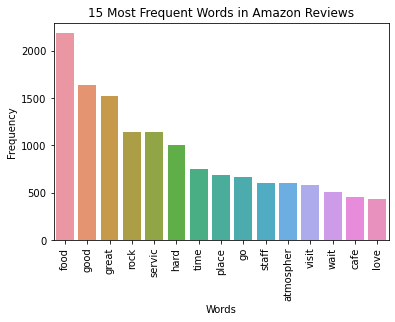

In [43]:
sns.barplot(data = word_freq_DF, x = "Words", y = "Count")
plt.ylabel("Frequency")
plt.xticks(rotation = 90)
plt.title("15 Most Frequent Words in Hard Rock Cafe NY Reviews")
plt.show()

# SENTIMENT ANALYSIS

In [44]:
hotel_df["Sentiment_TextBlob"] = hotel_df["Review"].apply(lambda x: TextBlob(x).sentiment[0])

In [45]:
hotel_df[["Review", "Sentiment_TextBlob"]].head(10)

,Review,Sentiment_TextBlob
0,may sound noisi initi find good place bar nois...,0.441667
1,good burger atmospher uniqu expect hard rock m...,0.204167
2,pre arrang breakfast peopl open us normal open...,0.143723
3,nice decor share platter crumb chicken spring ...,0.050000
4,great hard rock never bad countri favourit far...,0.443056
5,book onlin beforehand went year ago quit wait ...,0.483333
6,dissapiont say nice food drink servic well loo...,0.154167
7,legendari burger delici servic friendli good s...,0.566667
8,dinner daughter granddaught busi food fast per...,0.200000
9,go time get tabl worth special hamburg delici ...,0.452381


In [49]:
from nltk.stem import WordNetLemmatizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [50]:
senti = SentimentIntensityAnalyzer()
hotel_df["Sentiment_VADER"] = hotel_df["Review"].apply(lambda x: senti.polarity_scores(x)['compound'])

In [51]:
hotel_df[["Review", "Sentiment_VADER", "Sentiment_TextBlob"]].sample(15)

,Review,Sentiment_VADER,Sentiment_TextBlob
1017,one hard rock pretti much enjoy rock memorabil...,0.6908,0.302778
620,burger wife steak food realli good steak cook ...,0.8625,0.850000
2834,food good servic averag dã cor typic hard rock...,0.5267,0.181667
1189,go hard rock cafe expect level commerci servic...,0.6908,0.252083
796,visit new york alway get souvenir hard rock es...,0.2911,0.036174
151,visit hard rock cafe januari chaotic good musi...,0.6597,0.381667
1044,hard rock cafe food locat menu might bit diffe...,0.3612,0.204167
2718,one differ other bad thing food great servic g...,0.4767,0.022222
2708,like rock n roll realli enjoy place good music...,0.8885,0.600000
3041,shop restaur everyth els time squar big crowd ...,0.0000,0.000000


In [52]:
hotel_df[["Review", "Sentiment_VADER"]][hotel_df["Sentiment_VADER"] < -0.1]

,Review,Sentiment_VADER
12,lot hard rock cafe round world disappoint serv...,-0.7783
15,rude bar attend felt rush waitress seem consta...,-0.8176
49,daughter friend took limo citi would miss hang...,-0.4019
70,stay away get pretzel order peopl end five dif...,-0.6249
76,came last meal fli back u k fantast place musi...,-0.4215
...,...,...
2924,want experi hard rock nyc hand drink overal ba...,-0.4767
2942,restaur typic hard rock server pin man awesom ...,-0.1027
2958,seen one seen much type stop travel famili go ...,-0.2960
2968,crazi branch restaur pleas visit hard rock com...,-0.3818


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


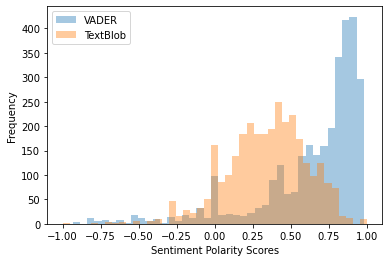

In [53]:
sns.distplot(hotel_df["Sentiment_VADER"], kde = False, label = "VADER")
sns.distplot(hotel_df["Sentiment_TextBlob"], kde = False, label = "TextBlob")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()

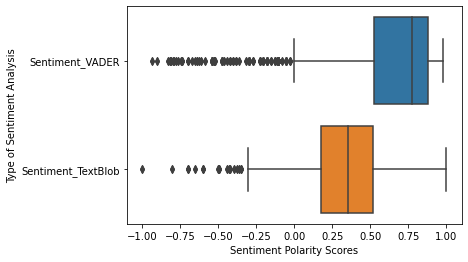

In [54]:
sns.boxplot(data = pd.melt(hotel_df[["Sentiment_VADER", "Sentiment_TextBlob"]]), x = "value", y = "variable")
plt.xlabel("Sentiment Polarity Scores")
plt.ylabel("Type of Sentiment Analysis")
plt.show()

# MOST POSITIVE REVIEWS - TEXTBLOB

In [55]:
DF_Pos_TB = hotel_df[["Review","Reviews_Lemm","Sentiment_TextBlob"]][hotel_df["Sentiment_TextBlob"] == hotel_df["Sentiment_TextBlob"].max()]

In [56]:
DF_Pos_TB

,Review,Reviews_Lemm,Sentiment_TextBlob
239,wait hour food wonder staf best mind wait cust...,"[wait, hour, food, wonder, staf, best, mind, w...",1.0
295,best food best drink superb atmospher would de...,"[best, food, best, drink, superb, atmospher, w...",1.0
399,rock cafe best one world beautif shin best dri...,"[rock, cafe, best, one, world, beautif, shin, ...",1.0
504,food superb staff friendli bartend serv chanta...,"[food, superb, staff, friendli, bartend, serv,...",1.0
999,atmospher rocki relax theme perfect day shop s...,"[atmospher, rocki, relax, theme, perfect, day,...",1.0
1784,wait hour food wonder staf best mind wait cust...,"[wait, hour, food, wonder, staf, best, mind, w...",1.0
1840,best food best drink superb atmospher would de...,"[best, food, best, drink, superb, atmospher, w...",1.0
1944,rock cafe best one world beautif shin best dri...,"[rock, cafe, best, one, world, beautif, shin, ...",1.0
2049,food superb staff friendli bartend serv chanta...,"[food, superb, staff, friendli, bartend, serv,...",1.0
2544,atmospher rocki relax theme perfect day shop s...,"[atmospher, rocki, relax, theme, perfect, day,...",1.0


# WORDCLOUD OF THE MOST POSITIVE REVIEWS - TEXTBLOB

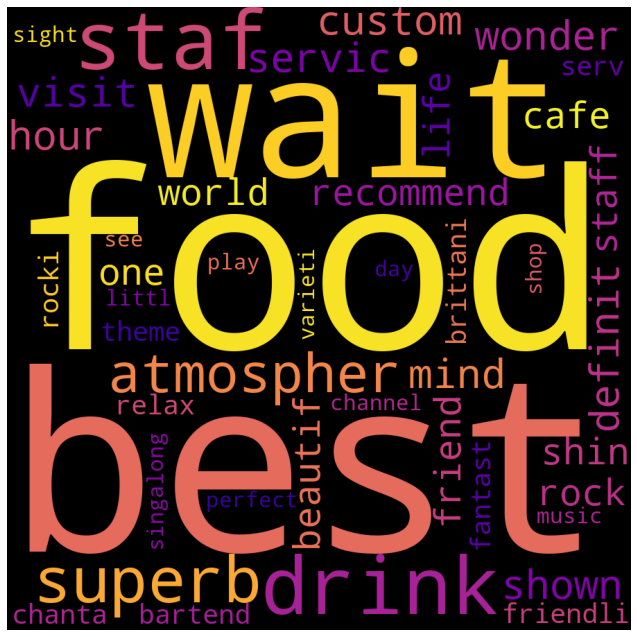

In [57]:
# Word Cloud from the most postive reviews from TextBlob

plt.figure(figsize = (9, 9))
wcloud_Pos_TB = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Pos_TB["Review"].tolist()).astype(str)))
plt.imshow(wcloud_Pos_TB)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

# MOST POSTIVE REVIEWS - VADER

In [58]:
hotel_df[["Review","Reviews_Lemm","Sentiment_VADER"]][hotel_df["Sentiment_VADER"] == hotel_df["Sentiment_VADER"].max()]

,Review,Reviews_Lemm,Sentiment_VADER
673,great food great staff great servic book advan...,"[great, food, great, staff, great, servic, boo...",0.9806
2218,great food great staff great servic book advan...,"[great, food, great, staff, great, servic, boo...",0.9806


In [59]:
DF_Pos_VADER = hotel_df[["Review","Reviews_Lemm","Sentiment_VADER"]][hotel_df["Sentiment_VADER"] > 0.8]

In [60]:
DF_Pos_VADER

,Review,Reviews_Lemm,Sentiment_VADER
0,may sound noisi initi find good place bar nois...,"[may, sound, noisi, initi, find, good, place, ...",0.8720
3,nice decor share platter crumb chicken spring ...,"[nice, decor, share, platter, crumb, chicken, ...",0.8442
4,great hard rock never bad countri favourit far...,"[great, hard, rock, never, bad, countri, favou...",0.9377
7,legendari burger delici servic friendli good s...,"[legendari, burger, delici, servic, friendli, ...",0.9186
9,go time get tabl worth special hamburg delici ...,"[go, time, get, tabl, worth, special, hamburg,...",0.8225
...,...,...,...
3050,go hard rock look michellin star food american...,"[go, hard, rock, look, michellin, star, food, ...",0.9485
3053,hrc great everi citi one incred thing like bea...,"[hrc, great, everi, citi, one, incred, thing, ...",0.8934
3056,went watch super bowl big screen great food gr...,"[go, watch, super, bowl, big, screen, great, f...",0.8689
3057,great food good atmospher realli nice place su...,"[great, food, good, atmospher, realli, nice, p...",0.9136


# WORDCLOUD OF THE MOST POSTIVE REVIEWS - VADER

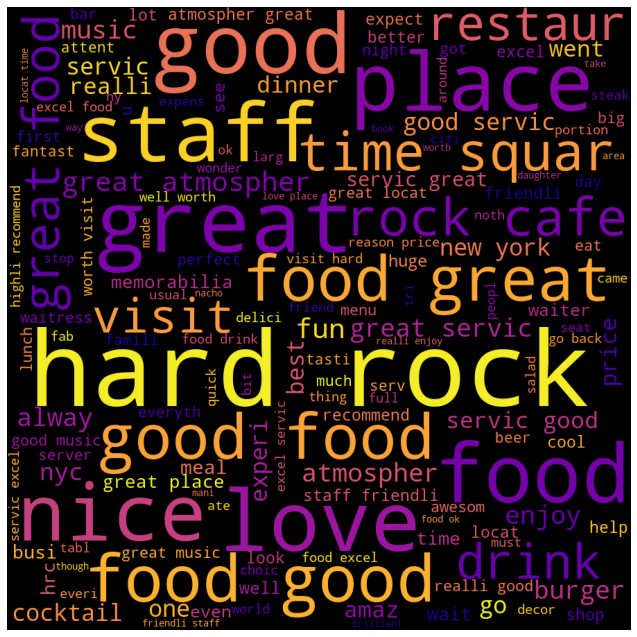

In [61]:
plt.figure(figsize = (9, 9))
wcloud_Pos_VADER = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Pos_VADER["Review"].tolist()).astype(str)))
plt.imshow(wcloud_Pos_VADER)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

# MOST NEGATIVE REVIEWS - TEXTBLOB

In [62]:
hotel_df[["Review","Reviews_Lemm","Sentiment_TextBlob"]][hotel_df["Sentiment_TextBlob"] == hotel_df["Sentiment_TextBlob"].min()]

,Review,Reviews_Lemm,Sentiment_TextBlob
70,stay away get pretzel order peopl end five dif...,"[stay, away, get, pretzel, order, peopl, end, ...",-1.0
1615,stay away get pretzel order peopl end five dif...,"[stay, away, get, pretzel, order, peopl, end, ...",-1.0


In [63]:
DF_Neg_TB = hotel_df[["Review","Reviews_Lemm","Sentiment_TextBlob"]][hotel_df["Sentiment_TextBlob"] < -0.0]

In [64]:
DF_Neg_TB

,Review,Reviews_Lemm,Sentiment_TextBlob
12,lot hard rock cafe round world disappoint serv...,"[lot, hard, rock, cafe, round, world, disappoi...",-0.205556
15,rude bar attend felt rush waitress seem consta...,"[rude, bar, attend, felt, rush, waitress, seem...",-0.418333
23,alway take hrc son birthday like busi vibe sur...,"[alway, take, hrc, son, birthday, like, busi, ...",-0.066667
39,visit cafe everi citi ritual hustl bustl broad...,"[visit, cafe, everi, citi, ritual, hustl, bust...",-0.250000
68,music fan must visit hard rock cafe must went ...,"[music, fan, must, visit, hard, rock, cafe, mu...",-0.291667
...,...,...,...
2996,first time eat hard rock cafe went pm wait hou...,"[first, time, eat, hard, rock, cafe, go, pm, w...",-0.069444
3020,pleas favor go someplac els hard rock found ar...,"[plea, favor, go, someplac, el, hard, rock, fi...",-0.077652
3036,went middl afternoon least line major plu six ...,"[go, middl, afternoon, least, line, major, plu...",-0.118750
3049,standard hard rock fayr friendli help staff li...,"[standard, hard, rock, fayr, friendli, help, s...",-0.194444


# WORDCLOUD OF THE MOST NEGATIVE REVIEWS - TEXTBLOB

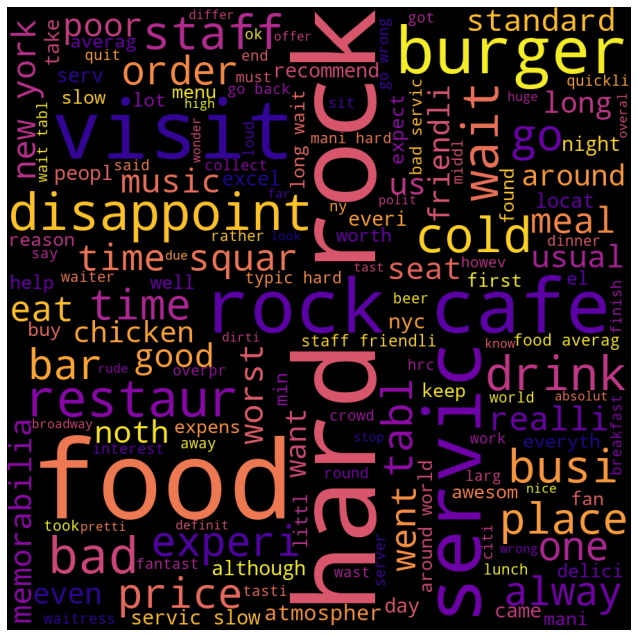

In [65]:
# Word Cloud of the most negative reviews from TextBlob

plt.figure(figsize = (9, 9))
wcloud_Neg_TB = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Neg_TB["Review"].tolist()).astype(str)))
plt.imshow(wcloud_Neg_TB)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

# MOST NEGATIVE REVIEWS - VADER

In [66]:
hotel_df[["Review","Reviews_Lemm","Sentiment_VADER"]][hotel_df["Sentiment_VADER"] == hotel_df["Sentiment_VADER"].min()]

,Review,Reviews_Lemm,Sentiment_VADER
472,took min take first order got secon round drin...,"[take, min, take, first, order, get, secon, ro...",-0.9337
2017,took min take first order got secon round drin...,"[take, min, take, first, order, get, secon, ro...",-0.9337


In [67]:
DF_Neg_VADER = hotel_df[["Review","Reviews_Lemm","Sentiment_VADER"]][hotel_df["Sentiment_VADER"] < -0.1]

In [68]:
DF_Neg_VADER 

,Review,Reviews_Lemm,Sentiment_VADER
12,lot hard rock cafe round world disappoint serv...,"[lot, hard, rock, cafe, round, world, disappoi...",-0.7783
15,rude bar attend felt rush waitress seem consta...,"[rude, bar, attend, felt, rush, waitress, seem...",-0.8176
49,daughter friend took limo citi would miss hang...,"[daughter, friend, take, limo, citi, would, mi...",-0.4019
70,stay away get pretzel order peopl end five dif...,"[stay, away, get, pretzel, order, peopl, end, ...",-0.6249
76,came last meal fli back u k fantast place musi...,"[come, last, meal, fli, back, u, k, fantast, p...",-0.4215
...,...,...,...
2924,want experi hard rock nyc hand drink overal ba...,"[want, experi, hard, rock, nyc, hand, drink, o...",-0.4767
2942,restaur typic hard rock server pin man awesom ...,"[restaur, typic, hard, rock, server, pin, man,...",-0.1027
2958,seen one seen much type stop travel famili go ...,"[see, one, see, much, type, stop, travel, fami...",-0.2960
2968,crazi branch restaur pleas visit hard rock com...,"[crazi, branch, restaur, pleas, visit, hard, r...",-0.3818


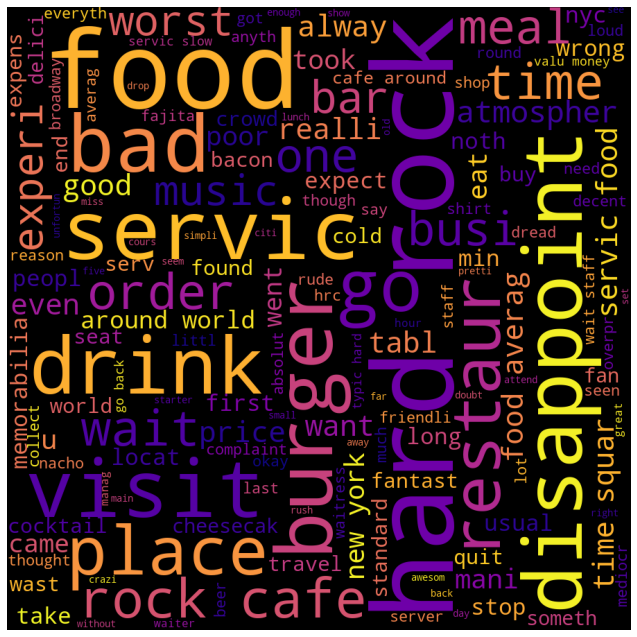

In [69]:
plt.figure(figsize = (9, 9))
wcloud_Neg_VADER = WordCloud(width = 900, height = 900, colormap = 'plasma', max_words = 150).generate(' '.join(pd.Series(DF_Neg_VADER["Review"].tolist()).astype(str)))
plt.imshow(wcloud_Neg_VADER)
plt.tight_layout(pad = 0.2)
plt.axis('off')
plt.show()

# BI-GRAMS

In [70]:
hotel_df["Bigrams"] = hotel_df["Reviews_Lemm"].apply(lambda x: list(ngrams(x, 2)))

In [71]:
hotel_df

,Review,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams
0,may sound noisi initi find good place bar nois...,"[may, sound, noisi, initi, find, good, place, ...","[may, sound, noisi, initi, find, good, place, ...",0.441667,0.8720,"[(may, sound), (sound, noisi), (noisi, initi),..."
1,good burger atmospher uniqu expect hard rock m...,"[good, burger, atmospher, uniqu, expect, hard,...","[good, burger, atmospher, uniqu, expect, hard,...",0.204167,0.3612,"[(good, burger), (burger, atmospher), (atmosph..."
2,pre arrang breakfast peopl open us normal open...,"[pre, arrang, breakfast, peopl, open, us, norm...","[pre, arrang, breakfast, peopl, open, us, norm...",0.143723,0.6808,"[(pre, arrang), (arrang, breakfast), (breakfas..."
3,nice decor share platter crumb chicken spring ...,"[nice, decor, share, platter, crumb, chicken, ...","[nice, decor, share, platter, crumb, chicken, ...",0.050000,0.8442,"[(nice, decor), (decor, share), (share, platte..."
4,great hard rock never bad countri favourit far...,"[great, hard, rock, never, bad, countri, favou...","[great, hard, rock, never, bad, countri, favou...",0.443056,0.9377,"[(great, hard), (hard, rock), (rock, never), (..."
...,...,...,...,...,...,...
3057,great food good atmospher realli nice place su...,"[great, food, good, atmospher, realli, nice, p...","[great, food, good, atmospher, realli, nice, p...",0.700000,0.9136,"[(great, food), (food, good), (good, atmospher..."
3058,wait hour half tabl sat cold room away main ro...,"[wait, hour, half, tabl, sat, cold, room, away...","[wait, hour, half, tabl, sit, cold, room, away...",-0.240000,0.0000,"[(wait, hour), (hour, half), (half, tabl), (ta..."
3059,new york style make hard rock best around worl...,"[new, york, style, make, hard, rock, best, aro...","[new, york, style, make, hard, rock, best, aro...",0.388939,0.8402,"[(new, york), (york, style), (style, make), (m..."
3060,fun place eat food good seve quickli mani rock...,"[fun, place, eat, food, good, seve, quickli, m...","[fun, place, eat, food, good, seve, quickli, m...",0.500000,0.7351,"[(fun, place), (place, eat), (eat, food), (foo..."


In [72]:
bigrams_list = list(itertools.chain.from_iterable(hotel_df['Bigrams']))
bigrams_freq = collections.Counter(bigrams_list)

bigrams_freq_DF = pd.DataFrame(bigrams_freq.most_common(30), columns=['Bigrams', 'Count'])
bigrams_freq_DF

,Bigrams,Count
0,"(hard, rock)",976
1,"(rock, cafe)",413
2,"(time, squar)",359
3,"(food, good)",322
4,"(good, food)",253
5,"(new, york)",242
6,"(food, great)",207
7,"(great, food)",188
8,"(good, servic)",164
9,"(great, atmospher)",160


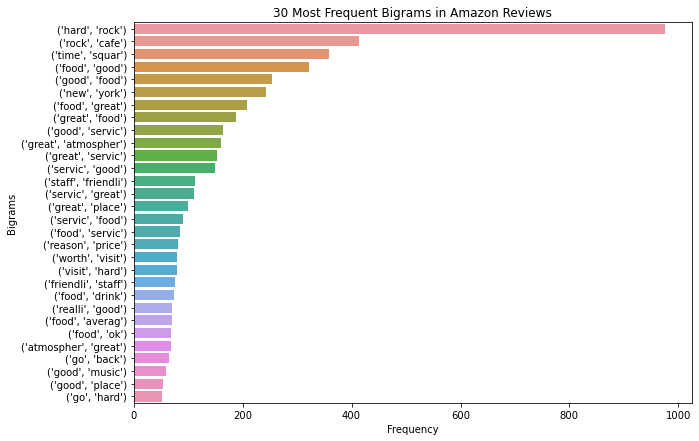

In [73]:
plt.figure(figsize = (10,7))
sns.barplot(data = bigrams_freq_DF, x = "Count", y = "Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigrams")
plt.title("30 Most Frequent Bigrams in Amazon Reviews")
plt.show()

# TRI-GRAMS

In [74]:
hotel_df["Trigrams"] = hotel_df["Reviews_Lemm"].apply(lambda x: list(ngrams(x, 3)))

In [75]:
hotel_df

,Review,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams
0,may sound noisi initi find good place bar nois...,"[may, sound, noisi, initi, find, good, place, ...","[may, sound, noisi, initi, find, good, place, ...",0.441667,0.8720,"[(may, sound), (sound, noisi), (noisi, initi),...","[(may, sound, noisi), (sound, noisi, initi), (..."
1,good burger atmospher uniqu expect hard rock m...,"[good, burger, atmospher, uniqu, expect, hard,...","[good, burger, atmospher, uniqu, expect, hard,...",0.204167,0.3612,"[(good, burger), (burger, atmospher), (atmosph...","[(good, burger, atmospher), (burger, atmospher..."
2,pre arrang breakfast peopl open us normal open...,"[pre, arrang, breakfast, peopl, open, us, norm...","[pre, arrang, breakfast, peopl, open, us, norm...",0.143723,0.6808,"[(pre, arrang), (arrang, breakfast), (breakfas...","[(pre, arrang, breakfast), (arrang, breakfast,..."
3,nice decor share platter crumb chicken spring ...,"[nice, decor, share, platter, crumb, chicken, ...","[nice, decor, share, platter, crumb, chicken, ...",0.050000,0.8442,"[(nice, decor), (decor, share), (share, platte...","[(nice, decor, share), (decor, share, platter)..."
4,great hard rock never bad countri favourit far...,"[great, hard, rock, never, bad, countri, favou...","[great, hard, rock, never, bad, countri, favou...",0.443056,0.9377,"[(great, hard), (hard, rock), (rock, never), (...","[(great, hard, rock), (hard, rock, never), (ro..."
...,...,...,...,...,...,...,...
3057,great food good atmospher realli nice place su...,"[great, food, good, atmospher, realli, nice, p...","[great, food, good, atmospher, realli, nice, p...",0.700000,0.9136,"[(great, food), (food, good), (good, atmospher...","[(great, food, good), (food, good, atmospher),..."
3058,wait hour half tabl sat cold room away main ro...,"[wait, hour, half, tabl, sat, cold, room, away...","[wait, hour, half, tabl, sit, cold, room, away...",-0.240000,0.0000,"[(wait, hour), (hour, half), (half, tabl), (ta...","[(wait, hour, half), (hour, half, tabl), (half..."
3059,new york style make hard rock best around worl...,"[new, york, style, make, hard, rock, best, aro...","[new, york, style, make, hard, rock, best, aro...",0.388939,0.8402,"[(new, york), (york, style), (style, make), (m...","[(new, york, style), (york, style, make), (sty..."
3060,fun place eat food good seve quickli mani rock...,"[fun, place, eat, food, good, seve, quickli, m...","[fun, place, eat, food, good, seve, quickli, m...",0.500000,0.7351,"[(fun, place), (place, eat), (eat, food), (foo...","[(fun, place, eat), (place, eat, food), (eat, ..."


In [76]:
trigrams_list = list(itertools.chain.from_iterable(hotel_df["Trigrams"]))
trigrams_freq = collections.Counter(trigrams_list)

trigrams_freq_DF = pd.DataFrame(trigrams_freq.most_common(40), columns=['Trigrams', 'Count'])
trigrams_freq_DF

,Trigrams,Count
0,"(hard, rock, cafe)",407
1,"(visit, hard, rock)",79
2,"(food, good, servic)",54
3,"(servic, good, food)",53
4,"(go, hard, rock)",52
5,"(hard, rock, cafã)",52
6,"(typic, hard, rock)",48
7,"(locat, time, squar)",46
8,"(great, food, great)",45
9,"(good, food, good)",44


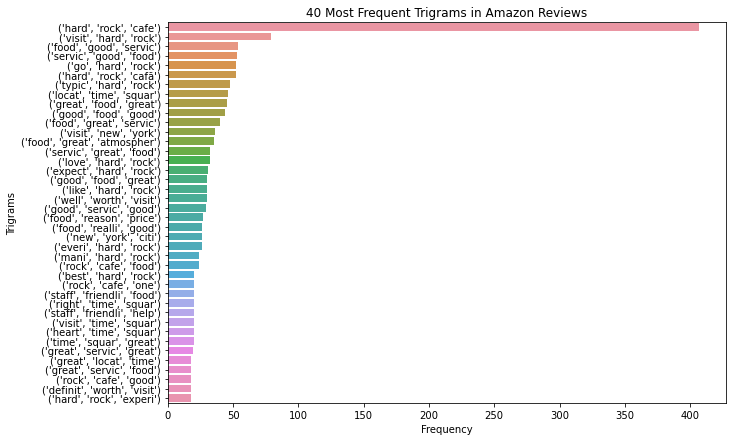

In [77]:
plt.figure(figsize = (10,7))
sns.barplot(data = trigrams_freq_DF, x = "Count", y = "Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigrams")
plt.title("40 Most Frequent Trigrams in Amazon Reviews")
plt.show()

In [78]:
hotel_df[["Sentiment_TextBlob", "Sentiment_VADER"]].describe()

,Sentiment_TextBlob,Sentiment_VADER
count,3062.000000,3062.000000
mean,0.339853,0.639002
std,0.266934,0.354576
min,-1.000000,-0.933700
25%,0.175000,0.526700
50%,0.357143,0.771700
75%,0.519687,0.880700
max,1.000000,0.980600


In [79]:
def sentiment_result(polarity):
    if polarity >= 0.1:
        return "Postive"
    elif polarity <= -0.1:
        return "Negative"
    else:
        return "Neutral"

In [80]:
hotel_df["Label"] = hotel_df["Sentiment_VADER"].apply(lambda x: sentiment_result(x))

In [81]:
hotel_df["Label"].value_counts()

Postive     2742
Negative     173
Neutral      147
Name: Label, dtype: int64

In [82]:
hotel_df

,Review,Reviews_Token,Reviews_Lemm,Sentiment_TextBlob,Sentiment_VADER,Bigrams,Trigrams,Label
0,may sound noisi initi find good place bar nois...,"[may, sound, noisi, initi, find, good, place, ...","[may, sound, noisi, initi, find, good, place, ...",0.441667,0.8720,"[(may, sound), (sound, noisi), (noisi, initi),...","[(may, sound, noisi), (sound, noisi, initi), (...",Postive
1,good burger atmospher uniqu expect hard rock m...,"[good, burger, atmospher, uniqu, expect, hard,...","[good, burger, atmospher, uniqu, expect, hard,...",0.204167,0.3612,"[(good, burger), (burger, atmospher), (atmosph...","[(good, burger, atmospher), (burger, atmospher...",Postive
2,pre arrang breakfast peopl open us normal open...,"[pre, arrang, breakfast, peopl, open, us, norm...","[pre, arrang, breakfast, peopl, open, us, norm...",0.143723,0.6808,"[(pre, arrang), (arrang, breakfast), (breakfas...","[(pre, arrang, breakfast), (arrang, breakfast,...",Postive
3,nice decor share platter crumb chicken spring ...,"[nice, decor, share, platter, crumb, chicken, ...","[nice, decor, share, platter, crumb, chicken, ...",0.050000,0.8442,"[(nice, decor), (decor, share), (share, platte...","[(nice, decor, share), (decor, share, platter)...",Postive
4,great hard rock never bad countri favourit far...,"[great, hard, rock, never, bad, countri, favou...","[great, hard, rock, never, bad, countri, favou...",0.443056,0.9377,"[(great, hard), (hard, rock), (rock, never), (...","[(great, hard, rock), (hard, rock, never), (ro...",Postive
...,...,...,...,...,...,...,...,...
3057,great food good atmospher realli nice place su...,"[great, food, good, atmospher, realli, nice, p...","[great, food, good, atmospher, realli, nice, p...",0.700000,0.9136,"[(great, food), (food, good), (good, atmospher...","[(great, food, good), (food, good, atmospher),...",Postive
3058,wait hour half tabl sat cold room away main ro...,"[wait, hour, half, tabl, sat, cold, room, away...","[wait, hour, half, tabl, sit, cold, room, away...",-0.240000,0.0000,"[(wait, hour), (hour, half), (half, tabl), (ta...","[(wait, hour, half), (hour, half, tabl), (half...",Neutral
3059,new york style make hard rock best around worl...,"[new, york, style, make, hard, rock, best, aro...","[new, york, style, make, hard, rock, best, aro...",0.388939,0.8402,"[(new, york), (york, style), (style, make), (m...","[(new, york, style), (york, style, make), (sty...",Postive
3060,fun place eat food good seve quickli mani rock...,"[fun, place, eat, food, good, seve, quickli, m...","[fun, place, eat, food, good, seve, quickli, m...",0.500000,0.7351,"[(fun, place), (place, eat), (eat, food), (foo...","[(fun, place, eat), (place, eat, food), (eat, ...",Postive


In [90]:
data = hotel_df.to_csv(r'C:\\Users\\user\\Desktop\\Hotel_Review\\Review.csv',index=True)

cwd

'C:\\Users\\user\\Desktop\\Hotel_Review'

In [85]:
data

In [88]:
import os
cwd = os.getcwd()

In [89]:
cwd

'C:\\Users\\user\\Desktop\\Hotel_Review'

In [91]:
import pandas as pd
import numpy as np
import os


In [92]:
data = pd.read_csv("Review.csv")

In [93]:
print("columns name\n\n",data.columns)


columns name

 Index(['Unnamed: 0', 'Review', 'Reviews_Token', 'Reviews_Lemm',
       'Sentiment_TextBlob', 'Sentiment_VADER', 'Bigrams', 'Trigrams',
       'Label'],
      dtype='object')


In [94]:
# dropping passed columns 
data.drop(['Unnamed: 0', 'Reviews_Token','Reviews_Lemm','Sentiment_TextBlob','Sentiment_VADER','Bigrams','Trigrams'], axis = 1, inplace = True) 

In [95]:
data = pd.DataFrame(data) 

In [96]:
data.head(3)

,Review,Label
0,may sound noisi initi find good place bar nois...,Postive
1,good burger atmospher uniqu expect hard rock m...,Postive
2,pre arrang breakfast peopl open us normal open...,Postive


In [97]:
data['Label'].unique

<bound method Series.unique of 0       Postive
1       Postive
2       Postive
3       Postive
4       Postive
         ...   
3057    Postive
3058    Neutral
3059    Postive
3060    Postive
3061    Postive
Name: Label, Length: 3062, dtype: object>

In [98]:
data.to_csv(r'model.csv',index=False)
os.getcwd()

'C:\\Users\\user\\Desktop\\Hotel_Review'